In [100]:
import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from tensorflow import keras
import pathlib
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split


In [74]:
current_path = os.getcwd()

rose_folder = 'rose'
sunflower_folder = 'sunflower'

rose_path = pathlib.Path(os.path.join(current_path, rose_folder))
sunflower_path = pathlib.Path(os.path.join(current_path, sunflower_folder))

rose_files = [x for x in rose_path.iterdir() if x.is_file()]
sunflower_files = [x for x in sunflower_path.iterdir() if x.is_file()]

In [16]:
class_names = {0:'rose', 1:'sunflower'}

In [4]:
def crop_image(image):
    
    im = Image.open(image)
    width, height = im.size   # Get dimensions
    left = (width - 150)/2
    top = (height - 150)/2
    right = (width + 150)/2
    bottom = (height + 150)/2

    cropped = im.crop((left, top, right, bottom))
    res = np.asarray(cropped)
    return res


In [106]:
X = []
y = []
size = 64, 64

for img_path in rose_files:
    img = cv2.imread(str(img_path))
    im = cv2.resize(img,size)
    X.append(im)
    y.append(0)
for img_path in sunflower_files:
    img = cv2.imread(str(img_path))
    im = cv2.resize(img,size)
    X.append(im)
    y.append(1)

In [107]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(1518, 64, 64, 3) (1518,)


In [108]:
X = X/255.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [109]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("y_val shape: " + str(y_val.shape))

number of training examples = 971
number of validation examples = 243
number of test examples = 304
X_train shape: (971, 64, 64, 3)
y_train shape: (971,)
X_val shape: (243, 64, 64, 3)
y_val shape: (243,)


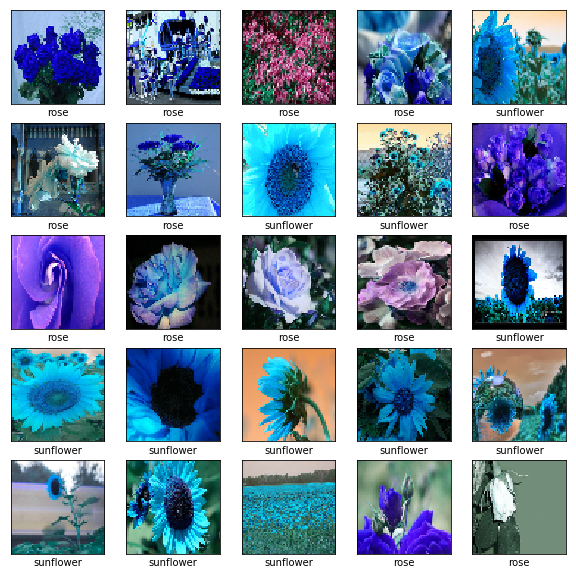

In [110]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [115]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [116]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
971/971 [==============================] - 1s 744us/step - loss: 1.5155 - acc: 0.7024
Epoch 2/5
971/971 [==============================] - 0s 344us/step - loss: 0.4230 - acc: 0.8538
Epoch 3/5
971/971 [==============================] - 0s 328us/step - loss: 0.4312 - acc: 0.8476
Epoch 4/5
971/971 [==============================] - 0s 372us/step - loss: 0.8834 - acc: 0.8033
Epoch 5/5
971/971 [==============================] - 0s 319us/step - loss: 0.6438 - acc: 0.8249


In [117]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

304/304 [==============================] - 0s 526us/step
Test accuracy: 0.8585526315789473
